In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the two result datasets
missing_IUR = pd.read_csv('/content/drive/MyDrive/Undergrad/Thesis/Results/Linear_MissingIUR.csv')
estimated_IUR = pd.read_csv('/content/drive/MyDrive/Undergrad/Thesis/Results/Linear_PCAEstimatedIUR.csv')

In [ ]:
# Find maximum calculated risks
max_missing_risk = missing_IUR['Calculated Risk'].max()
max_estimated_risk = estimated_IUR['Calculated Risk'].max()

print(f"Maximum calculated risk for missing IUR: {max_missing_risk}")
print(f"Maximum calculated risk for estimated IUR: {max_estimated_risk}")

Maximum calculated risk for missing IUR: 2.2559960001450392e-14
Maximum calculated risk for estimated IUR: 1.8114049000014866e-13


In [ ]:
# Calculate percent change for max risk
percent_change = ((max_estimated_risk - max_missing_risk) / max_missing_risk) * 100

print(f"Percent change between maximum calculated risks: {percent_change:.2f}%")

Percent change between maximum calculated risks: 702.93%


In [ ]:
# Make DF with differencs between calculated risks between Missing & Estimated
difference_df = pd.DataFrame()
difference_df['Difference in Calculated Risk'] = estimated_IUR['Calculated Risk'] - missing_IUR['Calculated Risk']

In [ ]:
# Add column for AML outcome (AML outcome is the same for both Missing & Estimated)
difference_df['AMLoutcome'] = missing_IUR['AMLoutcome']

In [ ]:
# Show first few rows
difference_df.head()

,Difference in Calculated Risk,AMLoutcome
0,2.641280e-14,0
1,3.296630e-14,0
2,4.163480e-14,0
3,1.164793e-13,0
4,6.649750e-14,0


In [ ]:
# Count AML positive vs negative
difference_df['AMLoutcome'].value_counts()

,count
AMLoutcome,
0,16280
1,39


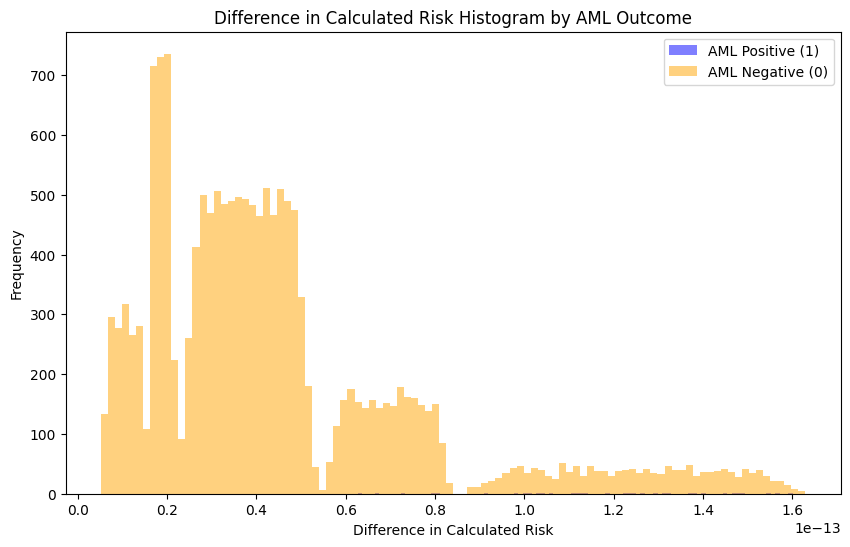

In [ ]:
# Filter the data by AML outcome
aml_positive = difference_df[difference_df['AMLoutcome'] == 1]['Difference in Calculated Risk']
aml_negative = difference_df[difference_df['AMLoutcome'] == 0]['Difference in Calculated Risk']

# Plot the histogram with color-coding
plt.figure(figsize=(10, 6))
plt.hist(aml_positive, bins=100, alpha=0.5, color='blue', label='AML Positive (1)')
plt.hist(aml_negative, bins=100, alpha=0.5, color='orange', label='AML Negative (0)')

# Add labels and legend
plt.xlabel('Difference in Calculated Risk')
plt.ylabel('Frequency')
plt.title('Difference in Calculated Risk Histogram by AML Outcome')
plt.legend()
plt.show()